#**AI voice phishing prevention system using STT API for the elderly and the weak**
######Edit data : 2021-09-18
######*2021 Probono Project*

### 할 것
1. 필요없는 코드들 전부 주석처리 하거나 삭제 
2. Git에 Upload 
3. 머신러닝 엔진 (에포크, 페이션스 등 성능 가장 좋은 모델 찾기) 
4. train, val 데이터 비슷하게 나눠지는 코드 찾아서 넣기

#**0. Requirement (import)**

In [1]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk python-dev python3-dev
# !pip3 install JPype1-py3
# !pip3 install konlpy
# !JAVA_HOME="C:\Program Files\Java\jdk-16.0.1"
import import_ipynb
from STTpreprocessing import *
from konlpy.tag import Okt
okt = Okt()

import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from random import *
from sklearn.datasets import load_digits
import nltk
from tqdm.notebook import tqdm            # show progress-bar
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#**1. KOR_EDA.py 모듈, yes,not 증량**

In [4]:
import sys
sys.path.append('C:/Users/Bell/2021-Probono-Project-main/KOREDA_SPAM.ipynb')
sys.path.append('C:/Users/Bell/2021-Probono-Project-main/KOREDA_normal.ipynb')

In [5]:
import KOREDA_SPAM as KEDA_1
import KOREDA_normal as KEDA_0

importing Jupyter notebook from KOREDA_SPAM.ipynb
importing Jupyter notebook from KOREDA_normal.ipynb


In [9]:
path="C:/Users/Bell/KOREN/vpdataset_scam.csv"

In [70]:
def spamdata_EDA(path):
    yesvpDataSet = pd.read_csv("C:/Users/Bell/KOREN/vpdataset_scam.csv" ,encoding='cp949')
    yesvpTextData = yesvpDataSet['content'].to_numpy()
    yesvpTargetData = yesvpDataSet['label'].to_numpy()
    yesDataBody=[]
    print("data set count : ",end='')
    for sample in yesvpTextData:
        for n in KEDA_1.KOR_EDA(sample):
            yesDataBody.append(n)
    yesvpTargetData_new = np.ones(len(yesDataBody))
    #yesvpTargetData_new = np.yesvpTargetData_new([:], dtype='i')
    print(len(yesDataBody))
    print(yesDataBody[0:2])
    print(type(yesDataBody))
    return yesDataBody, yesvpTargetData_new

In [57]:
yesvpDataSet = pd.read_csv("C:/Users/Bell/KOREN/vpdataset_scam.csv" ,encoding='cp949')
yesvpTextData = yesvpDataSet['content'].to_numpy()
yesvpTargetData = yesvpDataSet['label'].to_numpy()
yesDataBody=[]
print("data set count : ",end='')
for sample in yesvpTextData:
    for n in KEDA_1.KOR_EDA(sample):
        yesDataBody.append(n)

data set count : 

In [58]:
yesvpTargetData_new = np.ones(len(yesDataBody))

In [65]:
yesvpTargetData_new

array([1., 1., 1., ..., 1., 1., 1.])

In [62]:
yesvpTargetData_new = np.yesvpTargetData_new([:], dtype='i8')

SyntaxError: invalid syntax (4236660891.py, line 1)

In [71]:
text, target = spamdata_EDA("C:/Users/Bell/KOREN/vpdataset_scam.csv")

data set count : 4935
['제가 문자 오면 이유가 안열어보거든요 진술을 그럼 스팸메일 이런거 클릭해보신적 없으세요? 네 그거는 거의 안열어보거든요 웬만한거는 저희가 지금 전화를 드린 이상한건 김영민이가 지금 불법 도박사이트를 필리핀에서 운영하던 했어요 네 구매했다고 진술한 그걸 보면 전국의 약 이백오십여명한테 통장을 이놈이 아 놈이에요 구매했다고 네 어이가 없네요 지금 웃을 상황은 아니시고요', '제가 문자 오면 이상한건 안열어보거든요 아 그럼 스팸메일 이런거 클릭해보신적 없으세요? 네 그거는 거의 안열어보거든요 웬만한거는 저희가 지금 전화를 드린 이유가 김영민이가 지금 불법 도박사이트를 필리핀에서 운영하던 놈이에요 네 이놈이 진술한 그걸 보면 전국의 약 이백오십여명한테 통장을 구매했다고 진술을 했어요 구매했다고 네 어이가 없네요 지금 웃을 상황은 아니시고요']
<class 'list'>


In [72]:
print(len(target))

4935


In [73]:
target

array([1., 1., 1., ..., 1., 1., 1.])

In [26]:
# yesDataBody=[]
# print("data set count : ",end='')
# for sample in yesvpTextData:
#     for n in KEDA_1.KOR_EDA(sample):
#         yesDataBody.append(n)
# print(len(yesDataBody))
# print(yesDataBody[0:2])
# #num=705->11280

data set count : 

NameError: name 'yesvpTextData' is not defined

In [9]:
      #not Aug
notvpDataSet = pd.read_csv('C:/Users/Bell/KOREN/vpdataset_normal.csv', encoding='cp949')
notvpTextData = notvpDataSet['content'].to_numpy()
notvpTargetData = notvpDataSet['label'].to_numpy()
# #데이터셋개수줄이기
# num = 0
# notvpTextDataRed = []
# for k in range(1112):
#   a = ''
#   num += 50
#   for i in range(num-50, num):
#     sentence = notvpTextData[i]
#     a = a + sentence
#   notvpTextDataRed.append(a)

# notvpTextDataRed=np.array(notvpTextDataRed) #list to array (now, body=numpy)
# print(len(notvpTextData),"->",len(notvpTextDataRed))

In [10]:
print(len(notvpTextData))

705


In [11]:
notDataBody=[]

print("data set count : ",end='')

for sample in tqdm(notvpTextData):
    for n in KEDA_1.KOR_EDA(sample):
        notDataBody.append(n)
        
print(len(notDataBody))
print(notDataBody[0:3])

#num=705->11280

data set count : 

  0%|          | 0/705 [00:00<?, ?it/s]

4935
['네, 이거 확인을 해봤는데 이게 지금 이전에 데이터 자체를 초기화를 시킨 거라서 이 일 년도는 어 네, 확인이 어려우세요. 아 네, 알겠습니다. 네, 감사합니다. 네, 감사합니다.', '네, 이 확인을 해봤는데 이게 지금 이전에 데이터 자체를 초기화를 시킨 거라서 이거 일 년도는 네, 네, 확인이 어려우세요. 아 네, 알겠습니다. 네, 감사합니다. 어 감사합니다.', '네, 이거 확인을 해봤는데 이게 지금 이전에 데이터 자체를 초기화를 시킨 거라서 이 일 년도는 어 네, 확인이 어려우세요. 아 네, 알겠습니다. 네, 감사합니다. 네, 감사합니다.']


#**2. yesvp + notvp 데이터셋 만들기**

In [12]:
yesvpTextDataNew=yesDataBody
notvpTextDataNew=notDataBody

In [13]:
allTextData=np.append(yesvpTextDataNew,notvpTextDataNew)
print(len(allTextData))

9870


In [14]:
print(allTextData[:])

['제가 문자 오면 이상한건 안열어보거든요 아 그럼 스팸메일 이런거 클릭해보신적 없으세요? 네 그거는 거의 안열어보거든요 웬만한거는 저희가 지금 전화를 김영민이가 지금 불법 도박사이트를 필리핀에서 운영하던 놈이에요 이놈이 진술한 그걸 보면 전국의 약 통장을 구매했다고 진술을 했어요 구매했다고 네 어이가 없네요 지금 웃을 아니시고요'
 '통장을 지금 오면 이상한건 안열어보거든요 아 그럼 스팸메일 이런거 클릭해보신적 없으세요? 네 그거는 거의 안열어보거든요 웬만한거는 저희가 문자 전화를 드린 이유가 김영민이가 지금 불법 도박사이트를 필리핀에서 운영하던 놈이에요 네 이놈이 진술한 그걸 보면 전국의 구매했다고 이백오십여명한테 제가 약 네 했어요 구매했다고 진술을 어이가 없네요 지금 웃을 상황은 아니시고요'
 '제가 문자 오면 이상한건 안열어보거든요 아 그럼 스팸메일 이런거 클릭해보신적 없으세요? 네 그거는 거의 안열어보거든요 웬만한거는 저희가 지금 전화를 드린 이유가 김영민이가 지금 불법 도박사이트를 필리핀에서 운영하던 놈이에요 네 이놈이 진술한 그걸 보면 전국의 약 이백오십여명한테 통장을 구매했다고 진술을 했어요 구매했다고 네 어이가 없네요 지금 웃을 상황은 아니시고요'
 ...
 '아 네, 어제까지 이 예, 일단 저희가 네.네, 회원님 환불 원하시는 건가요? 이거 네, 일단 취소를 하고.어제 결제한 거 취소하고 저희가.다시 결제를 해야 되고 왜냐면 이거 교재권을 같이 사야될지 결정도 해야 되고 해가지구.일단 취소를 먼저 부탁드릴게요. 아이디요? 잠시만요.아이디가 뭐지 얘가.아 네, 잠시만요.아 네, 네, 네, 네, 요거 카드 전체 취소 원하시는 거 맞으실까요?네, 다시 구매할 건데. 어 인증을 또 새로 받아야 되는 건 아니죠? 그걸 모르겠어요. 왜냐면 이게 풀릴 수도 있거든요. 에, 수험표 어 인증 다시 받으셔야 될 수도 있거든요. 만약에 그 인.아 지금 해주시는 분이 어떻게 인증을 그냥 그대로 일 놔두실 수는 없는 거죠? 왜냐하면 저희가 인증 끝나면 삭제가 돼요

#**3. (ALL) Target Data**

In [15]:
print(len(yesvpTextData))
print(len(yesvpTextDataNew))
print(len(yesvpTargetData))
#필요없는 부분 삭제요망 

705
4935
705


In [16]:
#yes 데이터 라벨값 증량 개발

print(len(yesvpTargetData))
print(type(yesvpTargetData))
print(yesvpTargetData)

yesvpTargetDataNew=np.ones(4935)

print(len(yesvpTargetDataNew))
print(type(yesvpTargetDataNew))
print(yesvpTargetDataNew)


705
<class 'numpy.ndarray'>
['scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'
 'scam' 'scam' 'scam' 'scam' 'scam' 'scam' 'scam'

In [17]:
print(len(notvpTextData))
print(len(notvpTextDataNew))

705
4935


In [18]:
#라벨링 이거 이렇게 하는거 맞나? (5번에 있는거)
notvpTargetDataNew=np.zeros(4935)
print(notvpTargetDataNew)
print(len(notvpTargetDataNew))
print(type(notvpTargetDataNew))

[0. 0. 0. ... 0. 0. 0.]
4935
<class 'numpy.ndarray'>


In [19]:
allTargetData=np.append(yesvpTargetDataNew,notvpTargetDataNew) 
print(len(allTargetData))

9870


In [20]:
print(len(allTextData))
print(len(allTargetData))

9870
9870


#**4. 전처리(Preprocessing)**

In [21]:
import time
start = time.time()

#allTextData 토큰화
tokenize = []
num=0
for text in allTextData:
    
    num+=1
    tokenSet = okt.morphs(text)
    tokenize.append(tokenSet)
    if num%1000==0:
        print(num,"/",len(allTextData),"->",time.time()-start)
print(num,"/",len(allTextData),"->",time.time()-start)

1000 / 9870 -> 10.005111455917358
2000 / 9870 -> 24.148074626922607
3000 / 9870 -> 82.74171876907349
4000 / 9870 -> 111.97403478622437
5000 / 9870 -> 120.59477543830872
6000 / 9870 -> 148.31438612937927
7000 / 9870 -> 181.50597190856934
8000 / 9870 -> 201.38753151893616
9000 / 9870 -> 230.39638495445251
9870 / 9870 -> 250.43608283996582


In [22]:
stop_words = pd.read_csv('stopword.csv', encoding='cp949')
stop_data = np.array(stop_words['words']).tolist()

In [23]:
stop_data

['않다',
 '되어다',
 '되다',
 '하다',
 '어떻다',
 '이렇다',
 '이다',
 '어제',
 '매일',
 '아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼

In [23]:
# stopwords = []
# f = open('C:/Users/Bell/2021-Probono-Project-main/stopword.txt', 'rt', encoding='UTF8')
# lines = f.readlines()
# for line in lines:
#     line = line.strip()
#     stopwords.append(line)
# f.close()

# print(stopwords)

In [30]:
# 불용어처리
stop_result = []
stop_body = []
for tokenSet in tqdm(tokenize):
    for token in tokenSet:
        if token not in stop_data:
            stop_result.append(token)
    stop_body.append(stop_result)
    stop_result=[]

# #result엔 뭐가 들어있는거지 -> result는 샘플 하나의 불용어 처리한 결과가, body는 그런 result들이 append되서 만들어짐.
# print("토큰화 한 샘플(tokenize) = ",tokenize[0]) #토큰화 한 샘플
# print("불용어 처리 된 샘플(body) = ",stop_body[0]) #불용어 처리 된 샘플
# print(len(tokenize[0]))
# print(len(stop_body[0]))

  0%|          | 0/9870 [00:00<?, ?it/s]

In [31]:
print("토큰화 한 샘플(tokenize) = ",tokenize[0]) #토큰화 한 샘플
tqdm(print("불용어 처리 된 샘플(body) = ",stop_body[0])) #불용어 처리 된 샘플
print(len(tokenize[0]))
print(len(stop_body[0]))

토큰화 한 샘플(tokenize) =  ['제', '가', '문자', '오면', '이상한건', '안', '열어', '보거든요', '아', '그럼', '스팸메일', '이런거', '클릭', '해보신', '적', '없으세요', '?', '네', '그거', '는', '거의', '안', '열어', '보거든요', '웬만한거는', '저희', '가', '지금', '전화', '를', '김영민', '이', '가', '지금', '불법', '도박', '사이트', '를', '필리핀', '에서', '운영', '하던', '놈', '이에요', '이', '놈', '이', '진술', '한', '그걸', '보면', '전국', '의', '약', '통장', '을', '구매', '했다고', '진술', '을', '했어요', '구매', '했다고', '네', '어이', '가', '없네요', '지금', '웃', '을', '아니시고요']
불용어 처리 된 샘플(body) =  ['문자', '오면', '이상한건', '안', '열어', '보거든요', '스팸메일', '이런거', '클릭', '해보신', '적', '없으세요', '그거', '는', '안', '열어', '보거든요', '웬만한거는', '지금', '전화', '김영민', '지금', '불법', '도박', '사이트', '필리핀', '운영', '하던', '놈', '이에요', '놈', '진술', '한', '그걸', '보면', '전국', '약', '통장', '구매', '했다고', '진술', '구매', '했다고', '없네요', '지금', '웃', '아니시고요']


0it [00:00, ?it/s]

71
47


In [32]:
#어휘사전 만들기
t = Tokenizer()
tqdm(t.fit_on_texts(stop_body))
print(t.word_index)
print(len(t.word_index))

0it [00:00, ?it/s]

{'거': 1, '요': 2, ',': 3, '지금': 4, '는': 5, '이제': 6, '은': 7, '님': 8, '뭐': 9, '본인': 10, '도': 11, '확인': 12, '안': 13, '수': 14, '고객': 15, '게': 16, '한': 17, '말씀': 18, '만': 19, '고': 20, '하고': 21, '해': 22, '쪽': 23, '다': 24, '부분': 25, '서': 26, '예요': 27, '면': 28, '있는': 29, '때문': 30, '적': 31, '께서': 32, '원': 33, '번': 34, '진행': 35, '해서': 36, '분': 37, '통장': 38, '하는': 39, '계좌': 40, '할': 41, '니까': 42, '전화': 43, '되는': 44, '알겠습니다': 45, '은행': 46, '교재': 47, '감사합니다': 48, '죠': 49, '회원': 50, '이렇게': 51, '드릴': 52, '다시': 53, '근데': 54, '연락': 55, '그거': 56, '처리': 57, '내': 58, '선생님': 59, '강좌': 60, '인': 61, '한번': 62, '금융': 63, '전': 64, '하신': 65, '하시는': 66, '대출': 67, '사용': 68, '된': 69, '구매': 70, '시': 71, '대해': 72, '가지': 73, '경우': 74, '사건': 75, '그냥': 76, '건': 77, '한테': 78, '에는': 79, '두': 80, '수강': 81, '지': 82, '번호': 83, '자금': 84, '될': 85, '잘': 86, '같은': 87, '카드': 88, '정도': 89, '하시면': 90, '걸': 91, '입니다': 92, '하실': 93, '중': 94, '음': 95, '더': 96, '그런': 97, '라고': 98, '신청': 99, '있어요': 100, '명의': 101, '금액': 102, '이십': 103, '

In [33]:
#transform
sequence_data = t.texts_to_sequences(stop_body) #transform = 숫자화 
print('sequence_data[0]',sequence_data[0])

sequence_data[0] [285, 2749, 9807, 13, 2219, 5864, 9808, 2203, 455, 3127, 31, 651, 56, 5, 13, 2219, 5864, 9809, 4, 43, 4183, 4, 222, 1956, 332, 9104, 905, 3749, 3989, 246, 3989, 212, 17, 462, 542, 1353, 861, 38, 70, 1211, 212, 70, 1211, 3358, 4, 9810, 3602]


In [36]:
#단어사전 줄이기 
dicList = []

for sequenceSet in sequence_data:
    
#  temp = []
    temp=np.array([])
    for sequence in sequenceSet:
        if sequence > 499:
            sequence = 499
        temp=np.append(temp,sequence)
#    temp.append(sequence)
    dicList.append(temp)

print(dicList[0])
#print(len(t.word_index))
print(len(dicList))
dicList=np.array(dicList)

[285. 499. 499.  13. 499. 499. 499. 499. 455. 499.  31. 499.  56.   5.
  13. 499. 499. 499.   4.  43. 499.   4. 222. 499. 332. 499. 499. 499.
 499. 246. 499. 212.  17. 462. 499. 499. 499.  38.  70. 499. 212.  70.
 499. 499.   4. 499. 499.]
9870


C:\Users\Bell\AppData\Local\Temp\ipykernel_3736\1208438711.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dicList=np.array(dicList)


In [37]:
#Padding
padded = pad_sequences(dicList, truncating = 'post', maxlen = 500)
#print(padded[0])
print(padded.shape)

(9870, 500)


In [38]:
print(len(tokenize))

9870


In [39]:
allTextDataFinal=padded

#**5. 훈련/검증/테스트 데이터셋분할 (Train/Valid/Test)**

In [40]:
x = allTextDataFinal
y = allTargetData

In [41]:
#훈련데이터셋 분할
from sklearn.model_selection import train_test_split

#dataset 자체는 order가 깔끔히 정렬된 상태이기 때문에 반드시 dataset을 shuffle 해주어야 한다.
#sklearn에서 제공해주는 train_test_split을 활용하면 매우 쉽게 shuffle과 split을 할 수 있다.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#x_train= Train훈련데이터 
#x_test= Train테스트데이터 
#y_train= Target훈련데이터 
#y_test= Target테스트데이터 

#train_test_split()은 기본적으로 훈련데이터 세트를 75:25의 비율로 나눔 
#이 비율을 조정하고 싶을 때는 test_size 매개변수에 테스트 세트의 비율을 전달하면 조절할 수 있음 
#여기서는 입력된 데이터 세트의 30%를 테스트 세트로 나누기 위해 0.3를 전달

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.375)
#여기서는 입력된 데이터 세트의 30%를 테스트 세트로 나누기 위해 0.2를 전달

In [44]:
print("전체데이터=>",len(dicList),"\n")

print("학습데이터(Text)=>",len(x_train))
print("학습데이터(Target)=>",len(y_train),"\n")

print("검증데이터(Text)=>",len(x_val))
print("검증데이터(Target)=>",len(y_val),"\n")

print("테스트데이터(Text)=>",len(x_test))
print("테스트데이터(Target)=>",len(y_test),"\n")


전체데이터=> 9870 

학습데이터(Text)=> 4935
학습데이터(Target)=> 4935 

검증데이터(Text)=> 2961
검증데이터(Target)=> 2961 

테스트데이터(Text)=> 1974
테스트데이터(Target)=> 1974 



In [45]:
print(type(x_train))
print(type(x_val))

xTrain = np.array(x_train)
print(type(xTrain))
print(xTrain[0:1])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   

In [46]:
dict1 = np.array(dicList)
print(dict1[:10])
print(type(dict1))

[array([285., 499., 499.,  13., 499., 499., 499., 499., 455., 499.,  31.,
        499.,  56.,   5.,  13., 499., 499., 499.,   4.,  43., 499.,   4.,
        222., 499., 332., 499., 499., 499., 499., 246., 499., 212.,  17.,
        462., 499., 499., 499.,  38.,  70., 499., 212.,  70., 499., 499.,
          4., 499., 499.])
 array([ 38.,   4., 499., 499.,  13., 499., 499., 499., 499., 455., 499.,
         31., 499.,  56.,   5.,  13., 499., 499., 499., 285.,  43., 207.,
        456., 499.,   4., 222., 499., 332., 499., 499., 499., 499., 246.,
        499., 212.,  17., 462., 499., 499.,  70., 499., 499., 499.,  78.,
        499.,  70., 499., 212., 499.,   4., 499., 251.,   7., 499.])
 array([285., 499., 499.,  13., 499., 499., 499., 499., 455., 499.,  31.,
        499.,  56.,   5.,  13., 499., 499., 499.,   4.,  43., 207., 456.,
        499.,   4., 222., 499., 332., 499., 499., 499., 499., 246., 499.,
        212.,  17., 462., 499., 499., 499., 499., 499.,  78.,  38.,  70.,
        499., 21

In [47]:
print(type(x_val))

<class 'numpy.ndarray'>


#**6. 엔진**

In [48]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=500))
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) 
model.add(keras.layers.LSTM(8, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

In [49]:
print(type(x_train))
print(len(x_train))
#x_train1=x_train.astype(float)
#x_val=x_val.astype(float)

<class 'numpy.ndarray'>
4935


In [50]:
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
78/78 [==============================] - 21s 211ms/step - loss: 0.6918 - accuracy: 0.6332 - val_loss: 0.6909 - val_accuracy: 0.7538
Epoch 2/50
78/78 [==============================] - 16s 200ms/step - loss: 0.6893 - accuracy: 0.7684 - val_loss: 0.6878 - val_accuracy: 0.8254
Epoch 3/50
78/78 [==============================] - 16s 203ms/step - loss: 0.6851 - accuracy: 0.8326 - val_loss: 0.6825 - val_accuracy: 0.8443
Epoch 4/50
78/78 [==============================] - 15s 199ms/step - loss: 0.6777 - accuracy: 0.8424 - val_loss: 0.6733 - val_accuracy: 0.8571
Epoch 5/50
78/78 [==============================] - 15s 198ms/step - loss: 0.6644 - accuracy: 0.8598 - val_loss: 0.6564 - val_accuracy: 0.8558
Epoch 6/50
78/78 [==============================] - 15s 198ms/step - loss: 0.6411 - accuracy: 0.8616 - val_loss: 0.6263 - val_accuracy: 0.8788
Epoch 7/50
78/78 [==============================] - 15s 198ms/step - loss: 0.6009 - accuracy: 0.8967 - val_loss: 0.5776 - val_accuracy: 0.9027

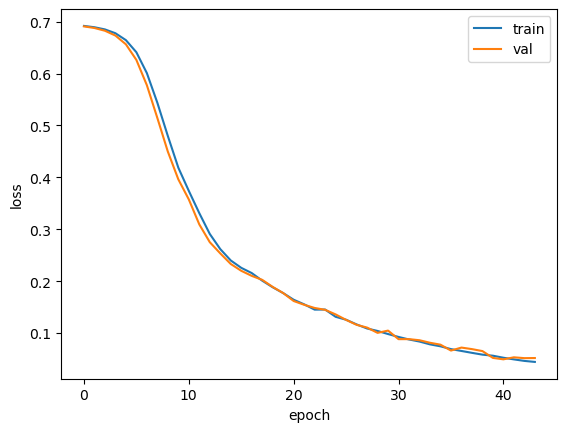

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [53]:
model.save('vpmodel1.h5')

In [55]:
rnn_model = keras.models.load_model('vpmodel1.h5')
rnn_model.evaluate(x_test, y_test)

62/62 [==============================] - 3s 39ms/step - loss: 0.0509 - accuracy: 0.9985


[0.050917476415634155, 0.9984802603721619]

In [79]:
print("\n 테스트 정확도: %.4f" % (rnn_model.evaluate(x_test, y_test)[1]))

62/62 [==============================] - 2s 39ms/step - loss: 0.0509 - accuracy: 0.9985

 테스트 정확도: 0.9985


In [85]:
preds = rnn_model.predict(x_test[0:1])

1/1 [==============================] - 0s 38ms/step


In [86]:
print(y_test[1])

0.0


In [87]:
print(preds)

[[0.05843782]]


In [88]:
if(preds>=0.5):
    print(f"보이스피싱입니다. 주의하세요. 보이스피싱일 확률 : {preds*100}%")
else:
    print(f"보이스피싱이 아닙니다. 보이스피싱일 확률 : {preds*100}%")

보이스피싱이 아닙니다. 보이스피싱일 확률 : [[5.8437824]]%


#**vptest**

In [59]:
preds2 = rnn_model.predict(padded2[0:1])

NameError: name 'padded2' is not defined

In [60]:
print(preds2)

NameError: name 'preds2' is not defined

In [107]:
if(preds2>=0.5):
  print("보이스피싱입니다. 주의하세요")
else:
  print("보이스피싱이 아닙니다.")

보이스피싱이 아닙니다.
